## Credit Card Fraud Detection

Predicting fraudulent credit card transactions with the help of Machine learning models. 

In [1]:
# Import the required libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Exploratory data analysis

In [2]:
# Read the required data
# The features already appear as principanl compnents other than time and amount

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Here we will observe the distribution of our classes
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print ("normal_share = ", normal_share, "fraud_share = ", fraud_share)

normal_share =  99.82725143693798 fraud_share =  0.1727485630620034


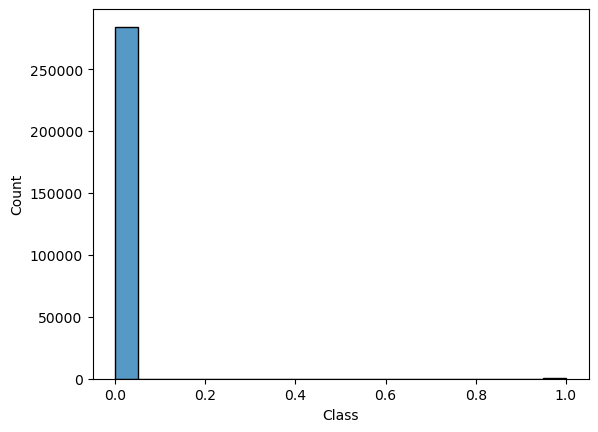

In [4]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
# Clearly there is an imbalance

sns.histplot(df.Class)
plt.show()

<Axes: xlabel='Time', ylabel='Class'>

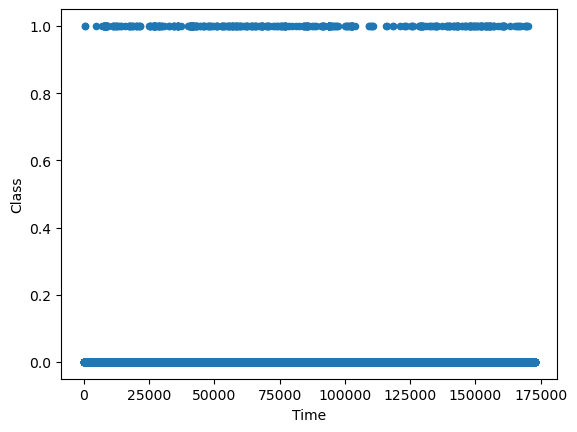

In [5]:
# Create a scatter plot to observe the distribution of classes with time
# The data appears evenly distributed for both classes.

df.plot.scatter(x='Time', y='Class')

<function matplotlib.pyplot.show(close=None, block=None)>

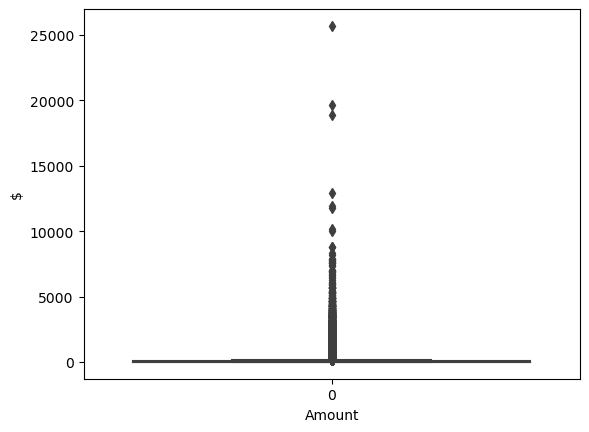

In [6]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.boxplot([df.Amount]).set(xlabel = 'Amount', ylabel = '$')
plt.show

In [7]:
# Drop unnecessary columns
# Droppng the time column

df.drop(columns=['Time'], axis = 1, inplace = True)

# Drop all rows with transactions about $10k since they seem to be outliers for this analysis
df.drop(df[df['Amount'] > 8000].index, axis = 0, inplace = True)

### Plotting the distribution of a variable

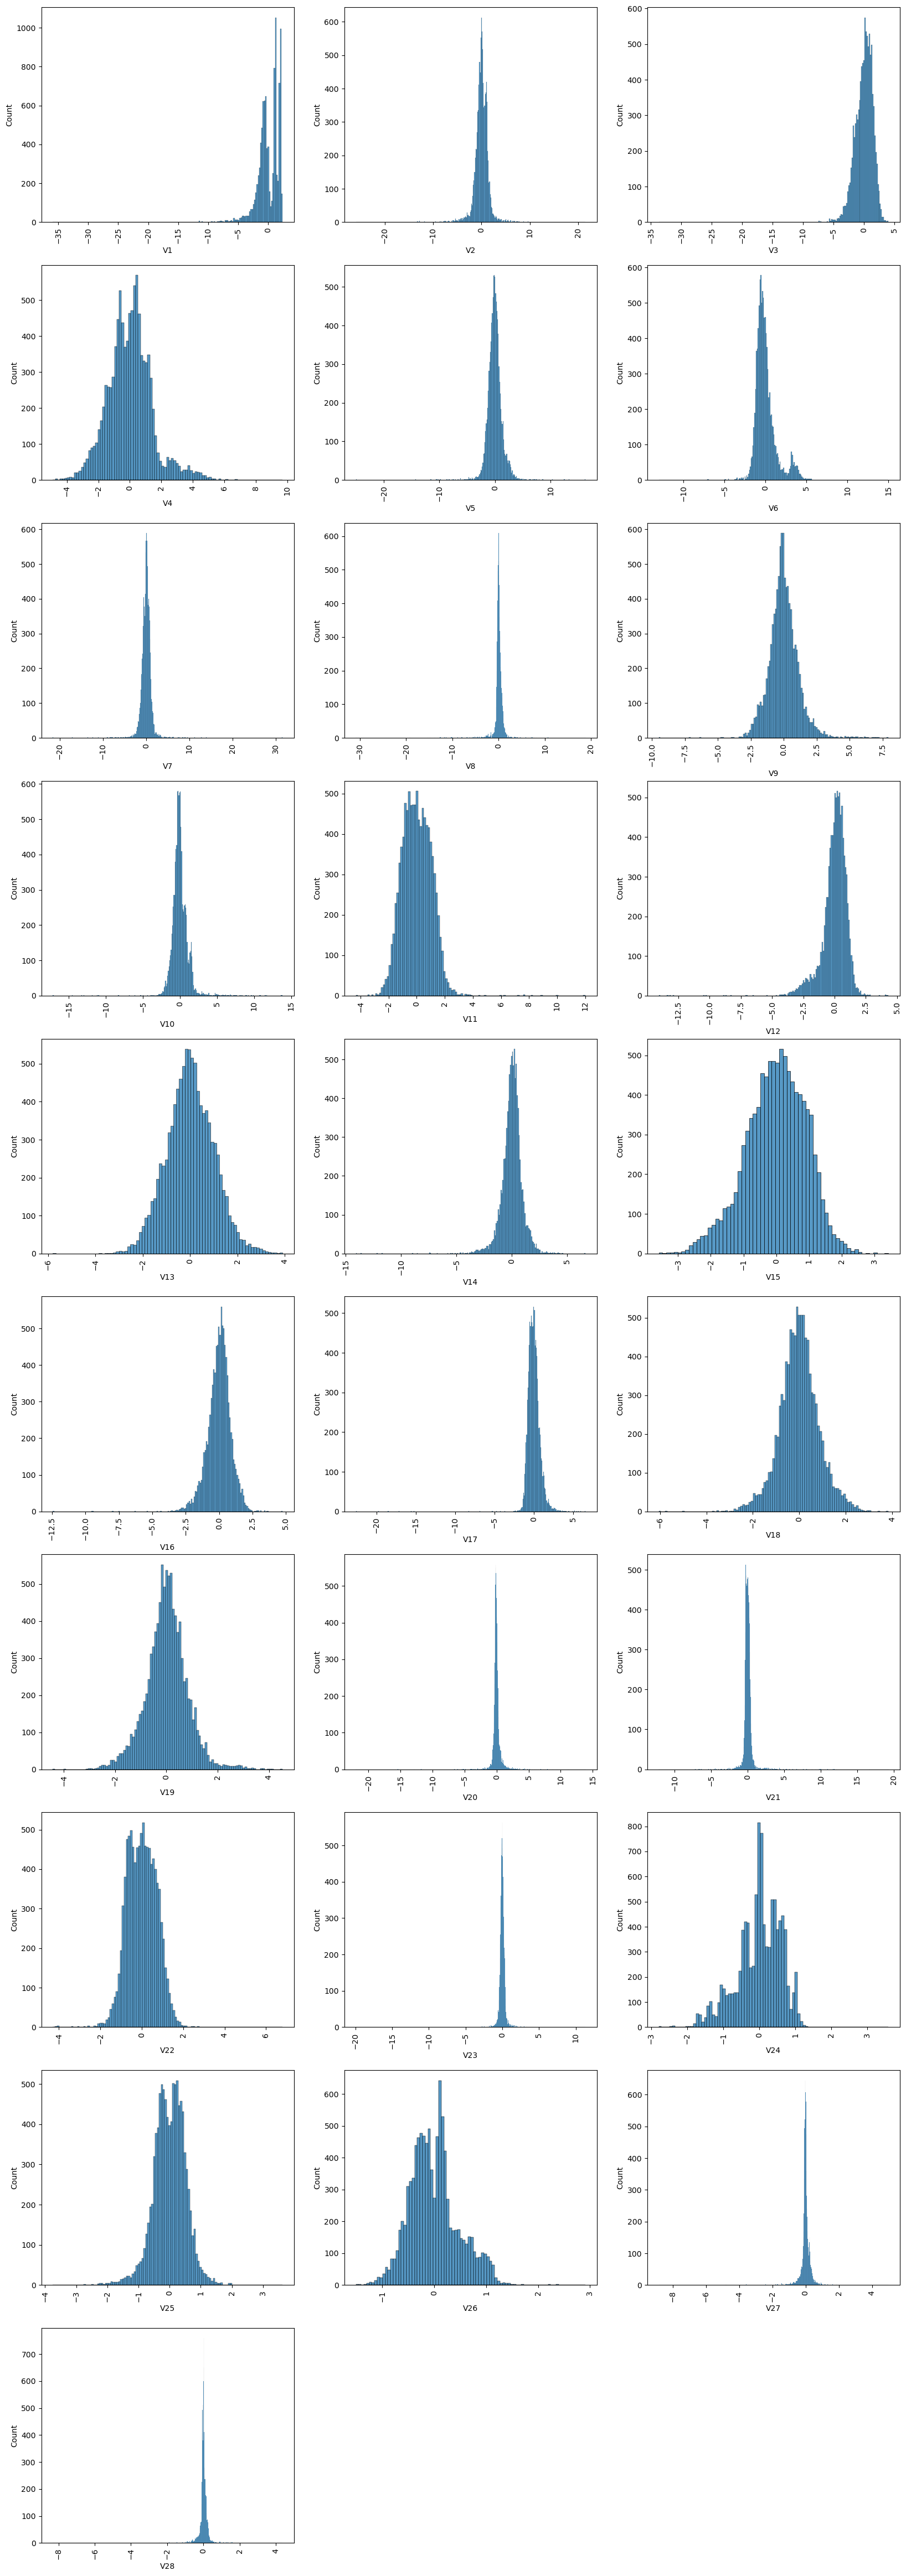

In [8]:
# plot the histogram of a variable from the dataset to see the skewness
cols=["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", 
      "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28"]

plt.figure(figsize=(20, 120))
count = 1
for i in cols:
    plt.subplot(20,3,count)
    plt.xticks(rotation=90)
    sns.histplot(x=df[i].sample(10000)) # Plotting a random sample of 10,000
    count += 1

plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [9]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data\
pt = PowerTransformer(copy=False)
pt.fit_transform(df['V1'].values.reshape(-1, 1))
pt.fit_transform(df['V6'].values.reshape(-1, 1))
pt.fit_transform(df['V12'].values.reshape(-1, 1))
pt.fit_transform(df['V24'].values.reshape(-1, 1))
pt.fit_transform(df['V26'].values.reshape(-1, 1))

array([[-0.32376696],
       [ 0.3535725 ],
       [-0.20975191],
       ...,
       [-0.09436287],
       [ 1.13066898],
       [-1.94374819]])

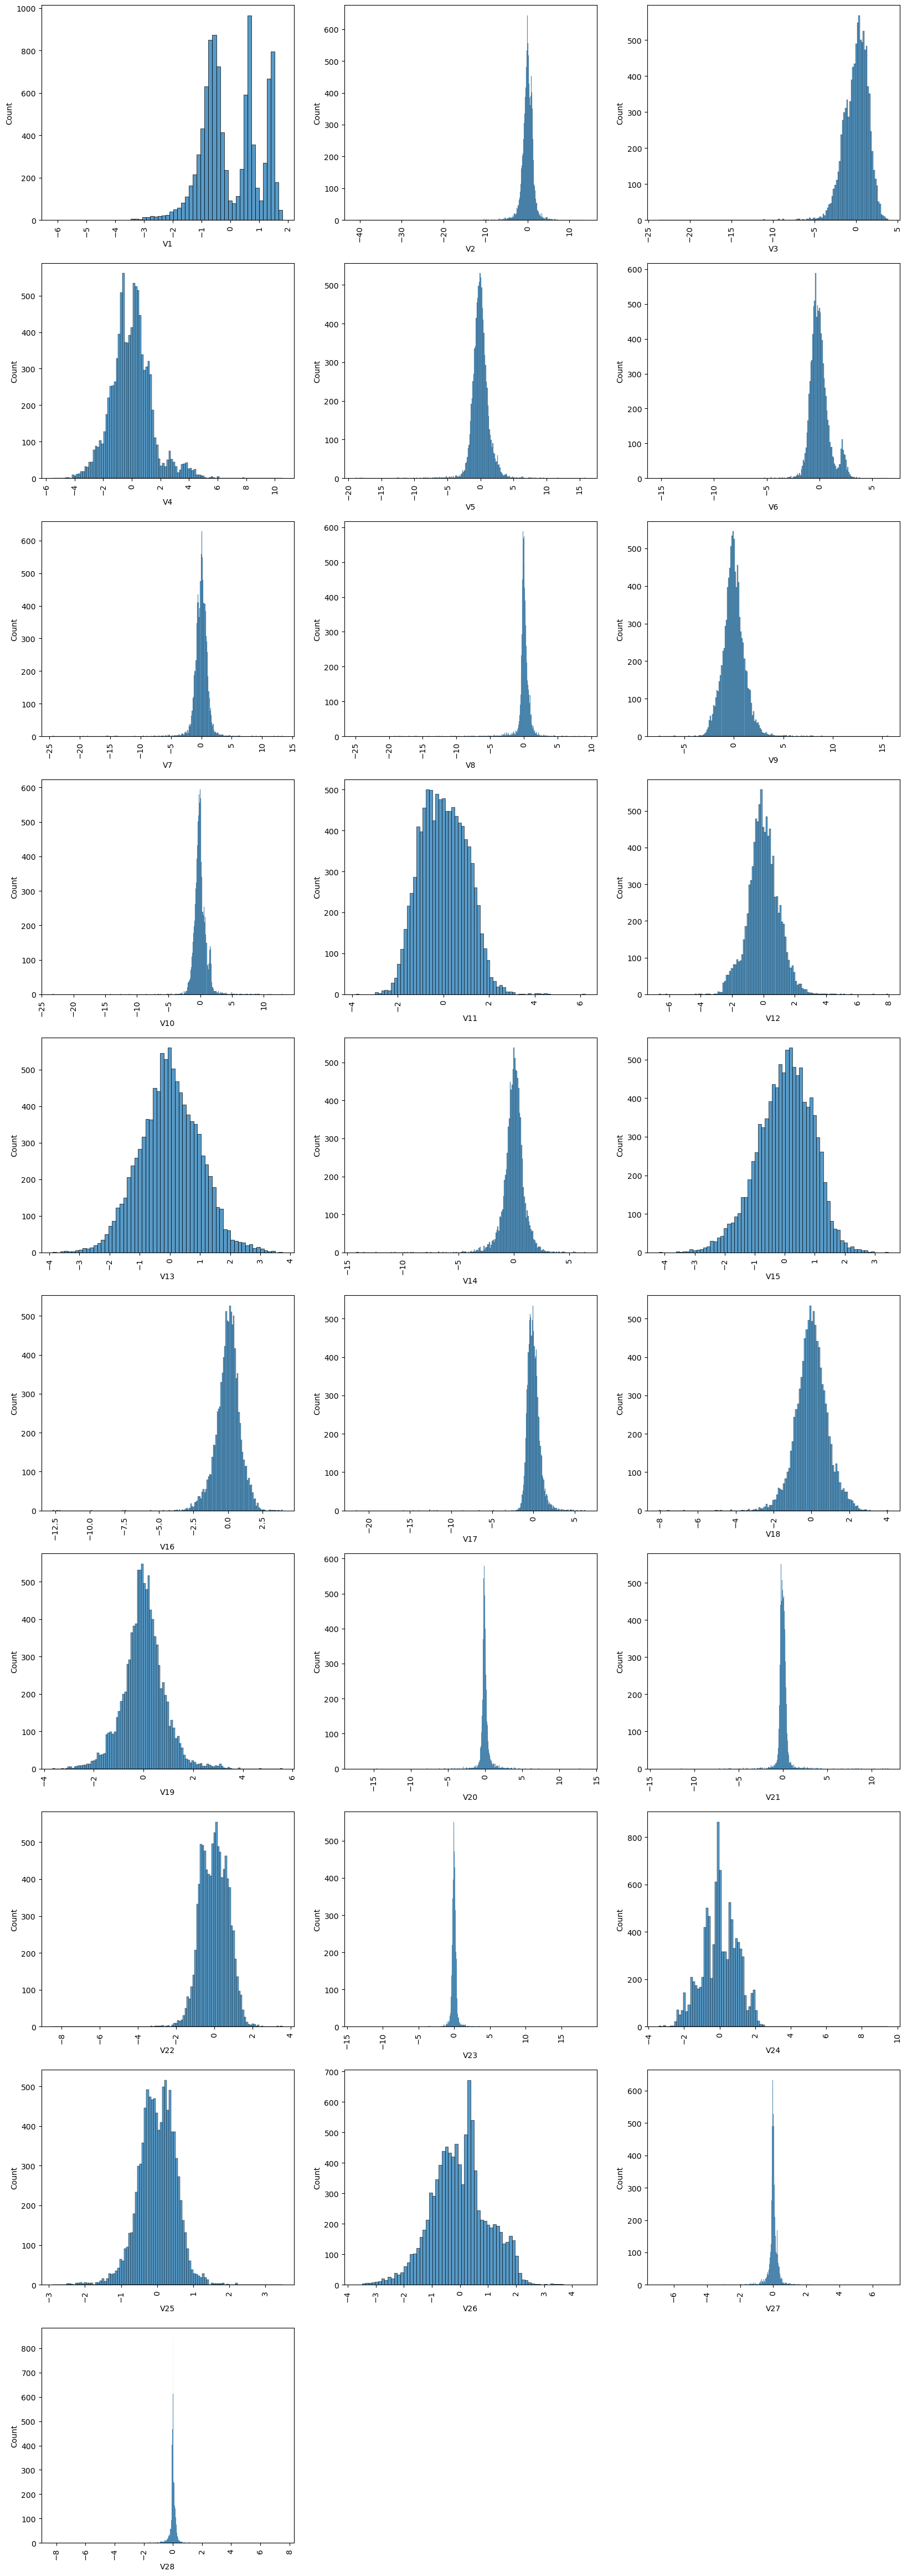

In [10]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20, 120))
count = 1
for i in cols:
    plt.subplot(20,3,count)
    plt.xticks(rotation=90)
    sns.histplot(x=df[i].sample(10000)) # Plotting a random sample of 10,000
    count += 1

plt.show()

### Splitting the data into train & test data

In [11]:
y= df['Class'] #class variable
X = df.drop(columns=['Class'], axis = 1)

In [12]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size = 0.3)

In [13]:
# see the distribution of class 1
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


## Model Building
- Build different models on the imbalanced dataset and see the result

In [14]:
# Function to print some classification metrics
def printMetrics(y_test, y_pred):
    print ("ROC_AUC_Score = " + "{:2.2}".format(metrics.roc_auc_score(y_test, y_pred)))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    precision = tp / (tp + fp)

    print ("Sensitivity = " + "{:2.2}".format(sensitivity))
    print ("Specificity = " + "{:2.2}".format(specificity))
    print ("Precision = " + "{:2.2}".format(precision))

In [15]:
# Create columns with different probability cutoffs 
def calcProbCutoff(pred_probs_train_rf, y):
    y_train_pred_rf = pd.DataFrame()
    y_train_pred_rf["Fraud"] = y
    y_train_pred_rf["Fraud_Prob"] = pred_probs_train_rf[:,1]

    numbers = [float(x)/20 for x in range(20)]
    for i in numbers:
        y_train_pred_rf[i]= y_train_pred_rf.Fraud_Prob.map(lambda x: 1 if x > i else 0)
    return y_train_pred_rf

In [16]:
# Function to print some classification metrics based on probability cutoff
def calcMetrics(y_train_pred_rf, y):

    cutoff_df_rf = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'TP', 'TN', 'FP', 'FN', 'precision', 'recall'])
    cutoff_df_rf.reset_index()

    num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
    for i in num:
        cm1 = metrics.confusion_matrix(y, y_train_pred_rf[i])
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])

        TP = cm1[1,1] # true positive 
        TN = cm1[0,0] # true negatives
        FP = cm1[0,1] # false positives
        FN = cm1[1,0] # false negatives

        precision = cm1[1,1]/(cm1[1,1] + cm1[0,1]) # TP/ (TP + FP)
        recall =  cm1[1,1]/(cm1[1,1] + cm1[1,0])   # TP / (TP + FN)

        cutoff_df_rf.loc[i] = [i,accuracy,sensi,speci, TP, TN, FP, FN, precision, recall]
    
    return cutoff_df_rf

In [17]:
# Logistic Regression on an unbalanced data set
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
printMetrics(y_test, y_pred_lr)
# Sensitivity is low

ROC_AUC_Score = 0.83
Sensitivity = 0.66
Specificity = 1.0
Precision = 0.9


In [18]:
# Trying another algorithm - Random forest on an unbalanced data set
# The optimal parameters have been found using RandomSearchCV. Only these parameters are shown here to avoid signficant computation time.
# Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=5, max_features=5, min_samples_leaf = 10, oob_score=True).fit(X_train, y_train)
print ("OOB_Score = " + str(rf.oob_score_))
y_pred_rf = rf.predict(X_test)
printMetrics(y_test, y_pred_rf)

# Sensitivity is low

OOB_Score = 0.9993779971508256
ROC_AUC_Score = 0.85
Sensitivity = 0.7
Specificity = 1.0
Precision = 0.94


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset
#### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 12
3rd Top var = 14


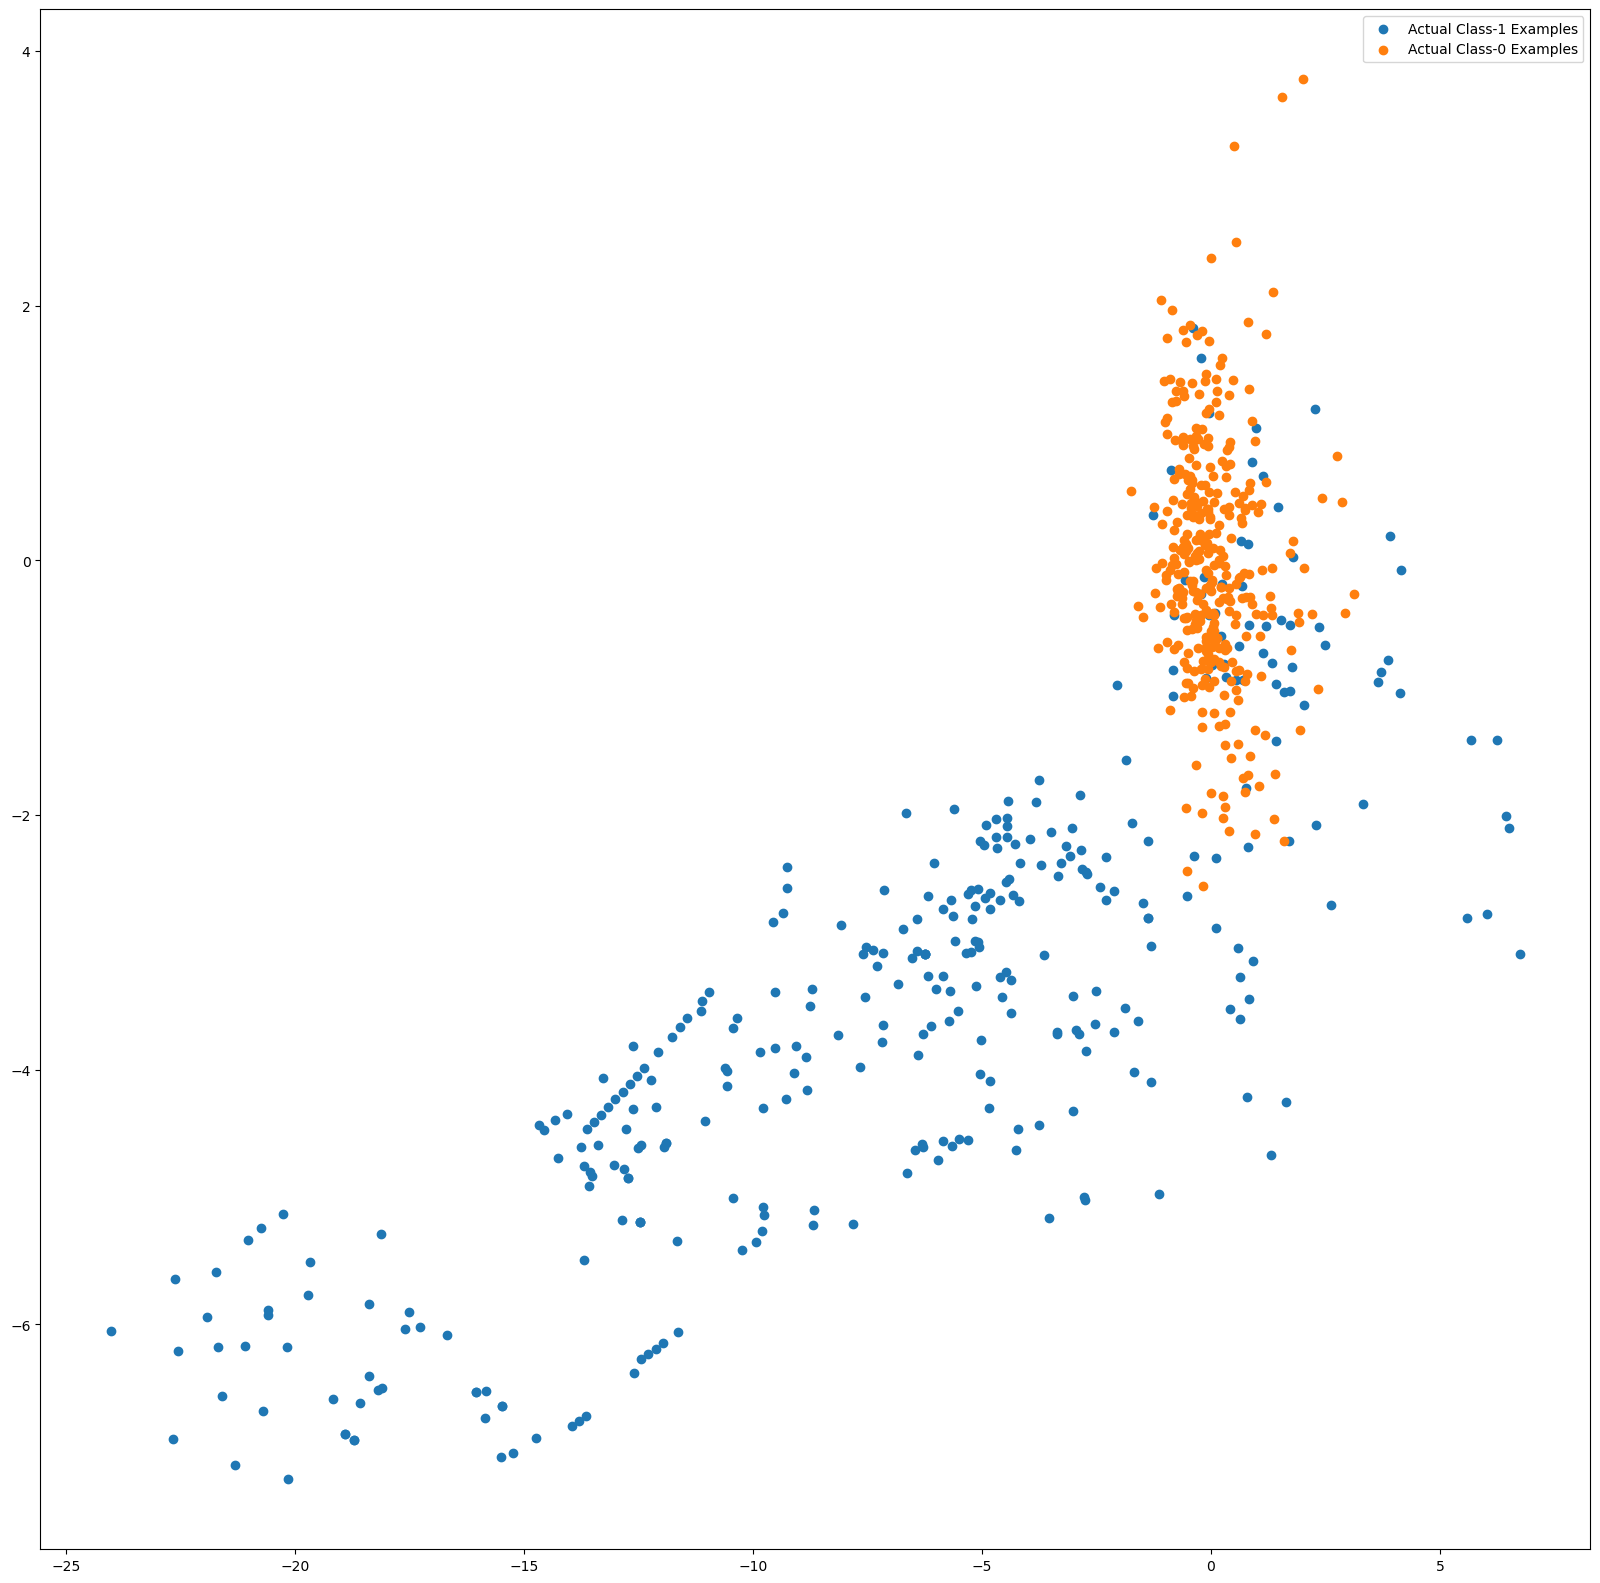

In [19]:
clf = rf #initialise the model with optimum hyperparameters
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [20]:
# Perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


In [21]:
# Run the logistic regression model
lr_ros = LogisticRegression().fit(X_train_ros, y_train_ros)
y_pred_ros = lr_ros.predict(X_test)
printMetrics(y_test, y_pred_ros)

# Precision is poor

ROC_AUC_Score = 0.95
Sensitivity = 0.92
Specificity = 0.98
Precision = 0.068


In [22]:
# Run the XG Boost model. Optimum parameters have been determined separately
xgb_ros = XGBClassifier(eval_metric='error', subsample=0.8, n_estimators=300, min_child_weight=10, max_depth=5, learning_rate=0.1, gamma=1, colsample_bytree=1, folds = 3).fit(X_train_ros, y_train_ros)
y_pred_xgb_ros = xgb_ros.predict(X_test)
printMetrics(y_test, y_pred_xgb_ros)

ROC_AUC_Score = 0.91
Sensitivity = 0.82
Specificity = 1.0
Precision = 0.9


### Print the class distribution after applying SMOTE 

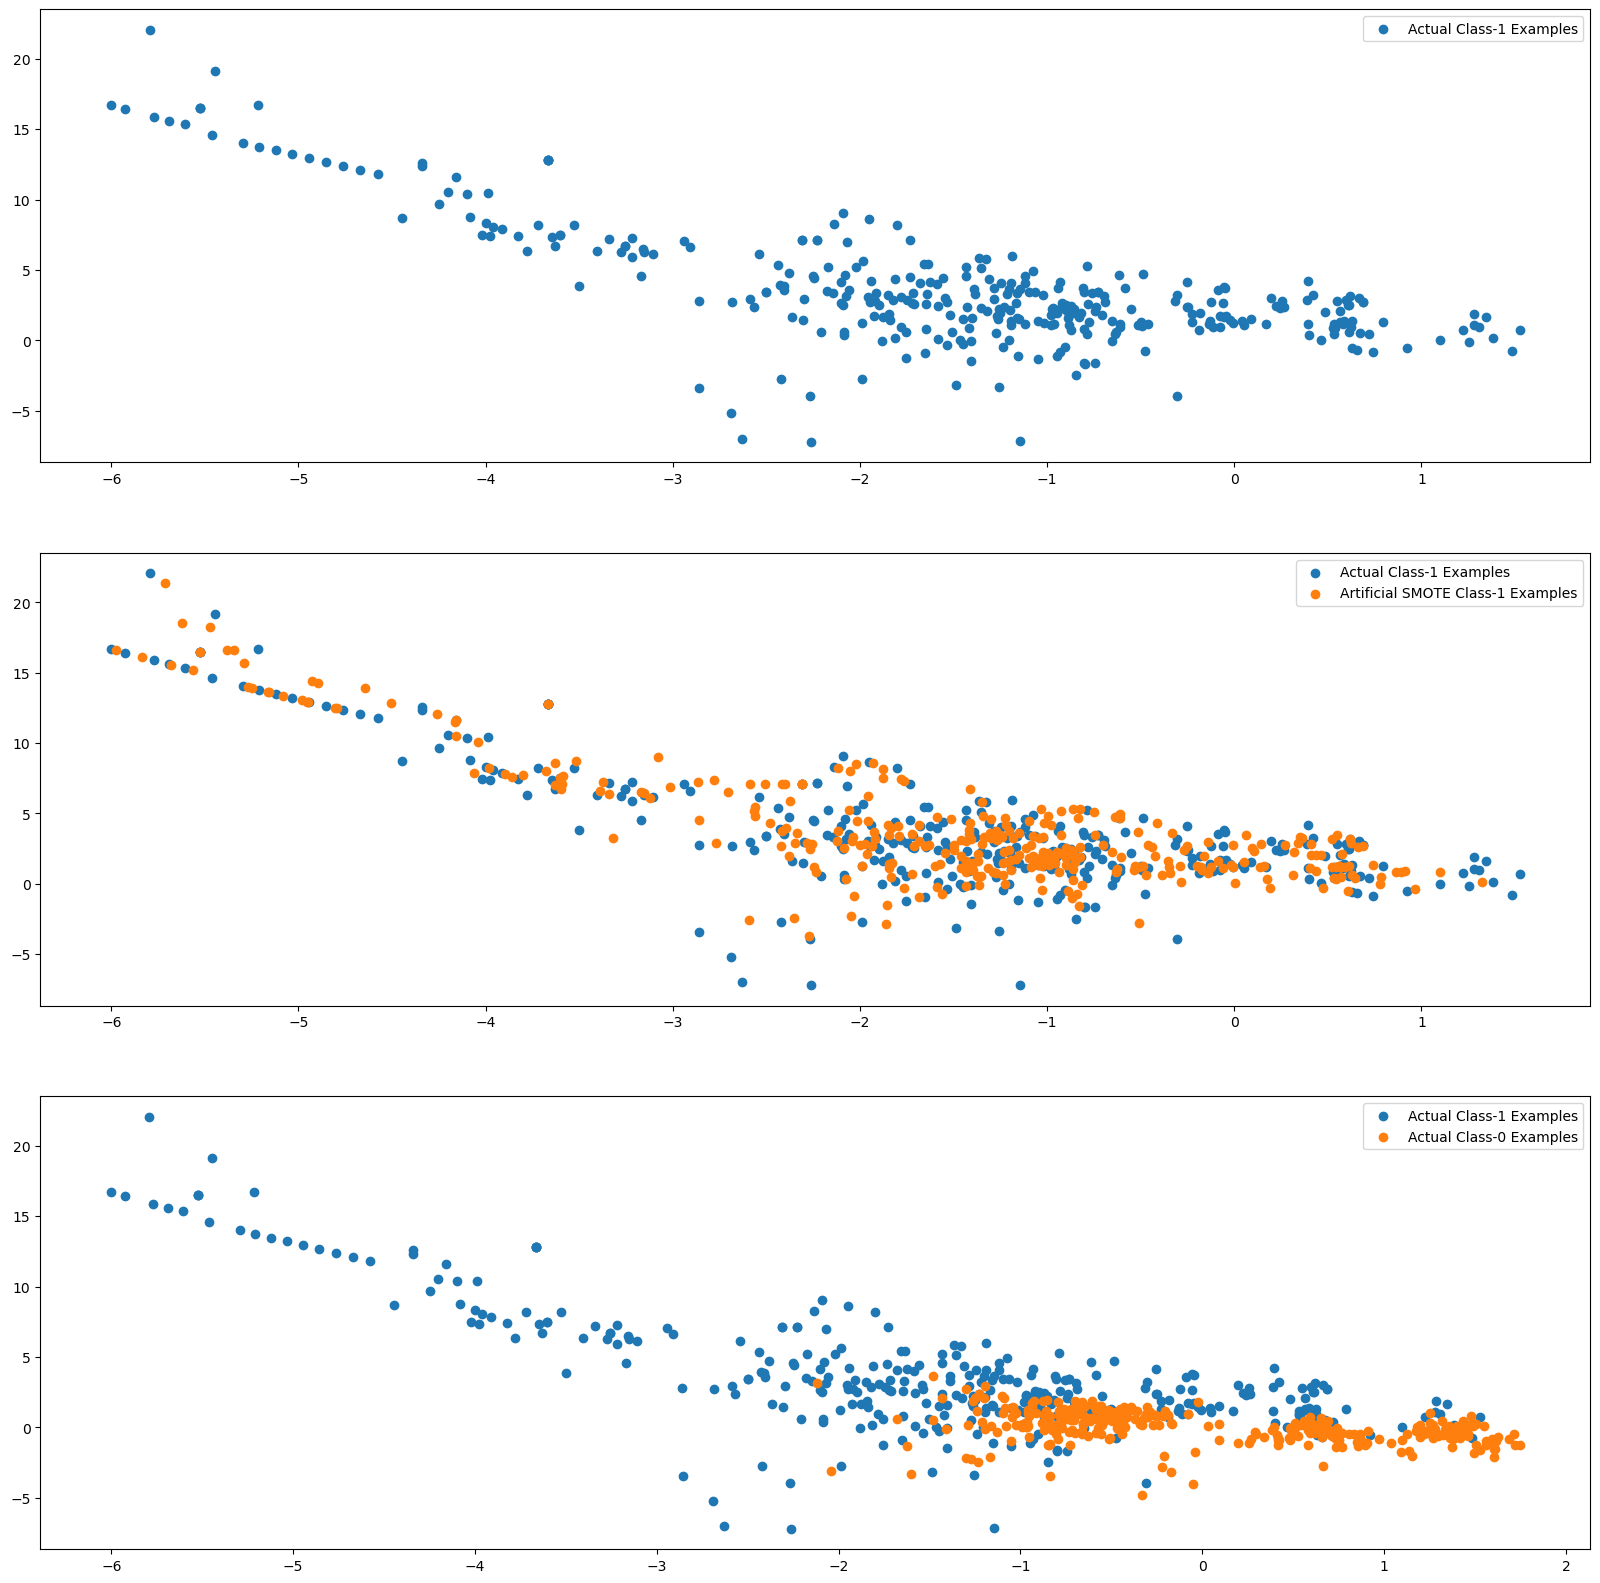

In [23]:
sm = over_sampling.SMOTE()
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [24]:
# Use logistic regression with SMOTE balanced data. 
lr_smote = LogisticRegression().fit(X_train_smote, y_train_smote)
y_pred_smote = lr_smote.predict(X_test)
printMetrics(y_test, y_pred_smote)

# Precision is quite poor. Once again False positive rate is high

ROC_AUC_Score = 0.95
Sensitivity = 0.91
Specificity = 0.98
Precision = 0.076


In [25]:
# Use SVM with SMOTE balanced data
# This did not work out. The computation took too long and never ended
#svc_smote = SVC(kernel='linear', gamma='auto').fit(X_train_smote, y_train_smote)
#y_pred_svc_smote = svc_smote.predict(X_test)
#printMetrics(y_test, y_pred_svc_smote)

In [26]:
# Use XGB with SMOTE balanced data. Optimum parameters have been determined separately
xgb_smote = XGBClassifier(eval_metric='error', subsample=0.8, n_estimators=300, min_child_weight=10, max_depth=5, learning_rate=0.1, gamma=1, colsample_bytree=1, folds = 3).fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = xgb_smote.predict(X_test)
printMetrics(y_test, y_pred_xgb_smote)

# Acceptable Sensitivity and Precision

ROC_AUC_Score = 0.92
Sensitivity = 0.84
Specificity = 1.0
Precision = 0.79


### Print the class distribution after applying ADASYN

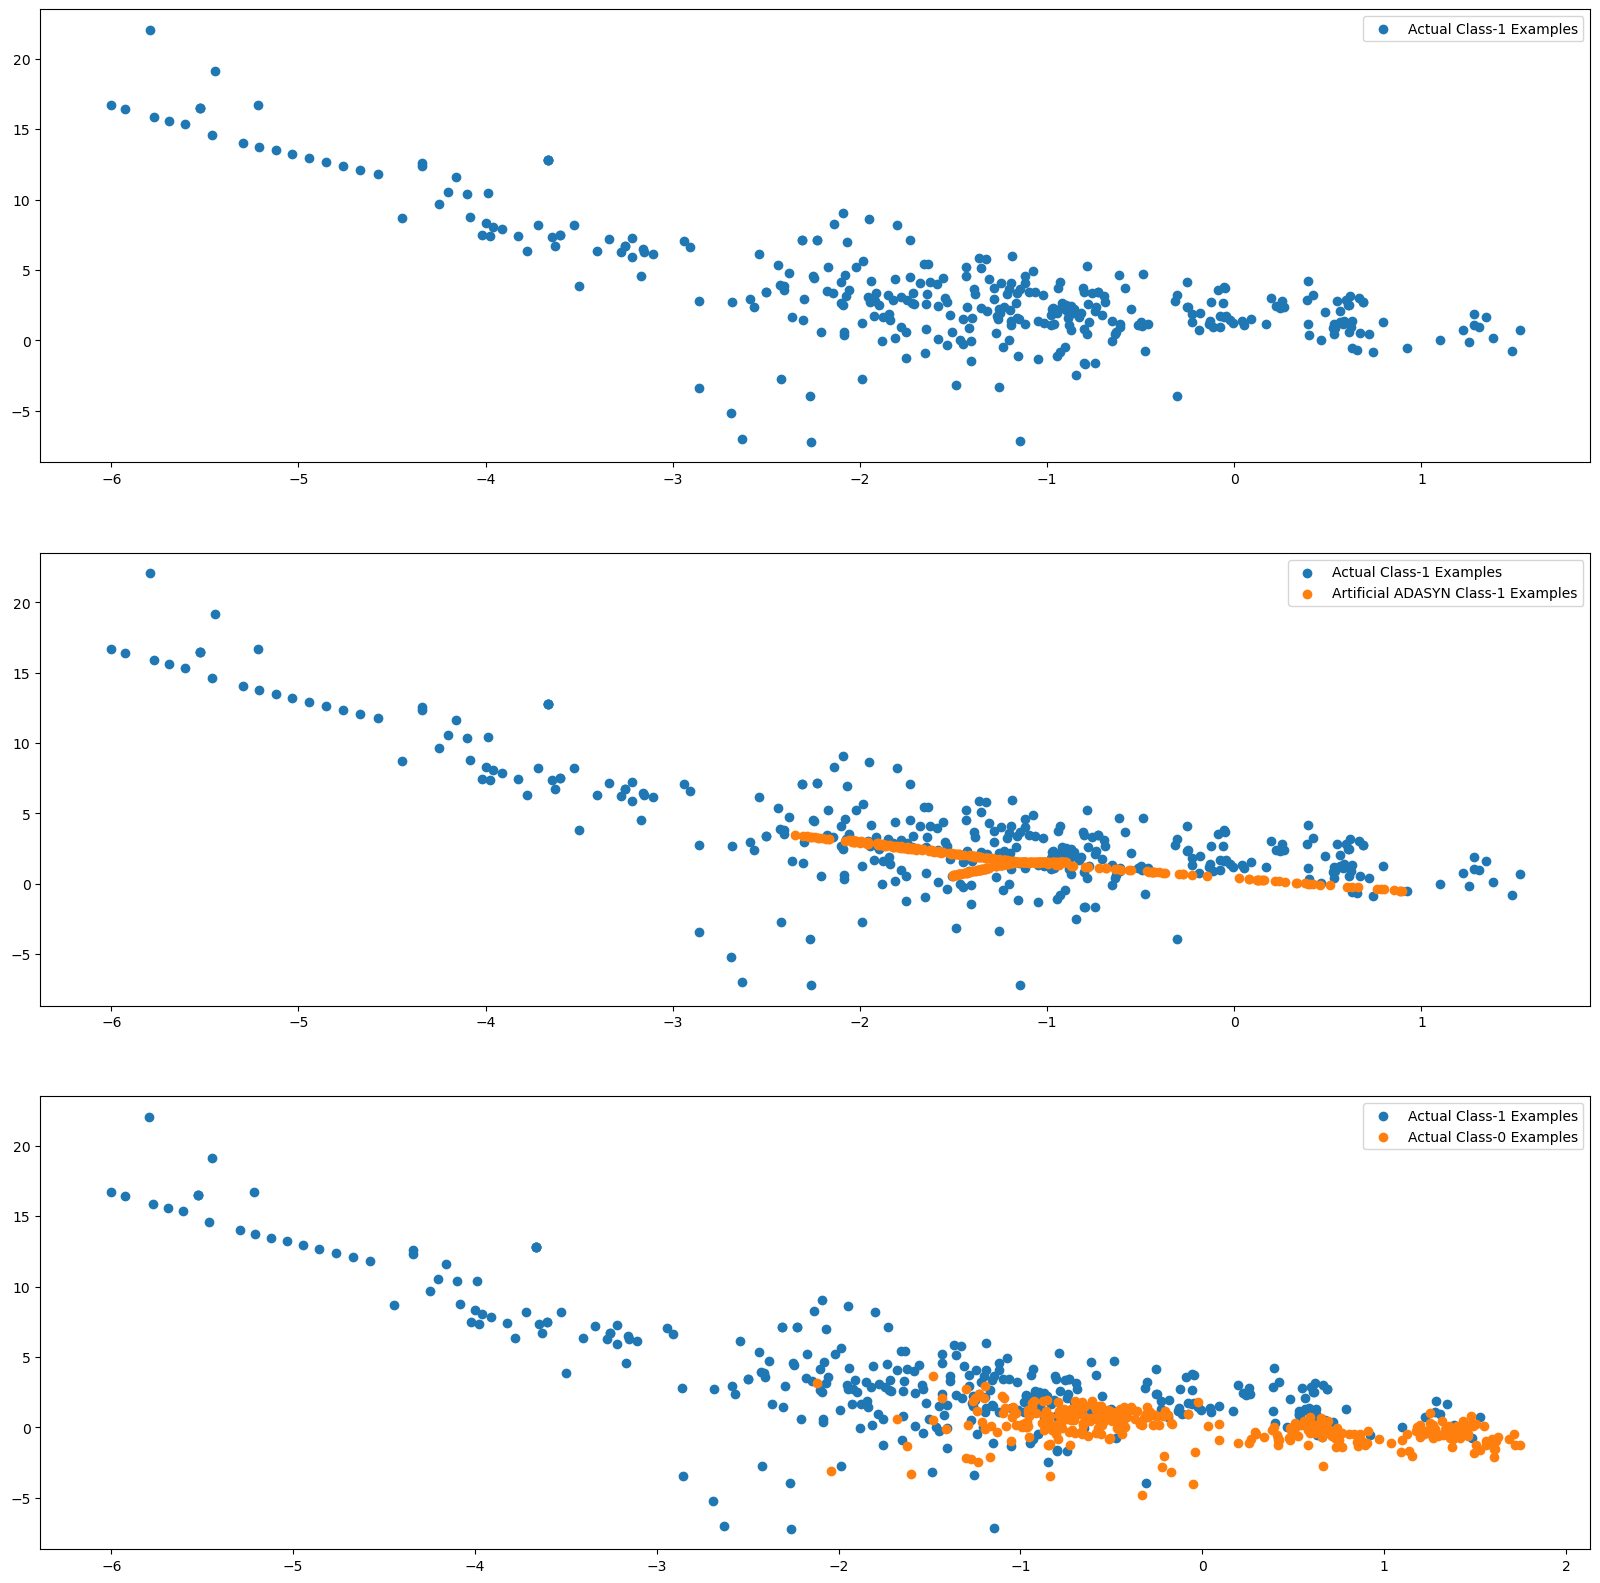

In [27]:
ada = over_sampling.ADASYN()
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:].to_numpy()

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [28]:
# Use logistic regression with ADASYN balanced data
lr_adasyn = LogisticRegression().fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = lr_adasyn.predict(X_test)
printMetrics(y_test, y_pred_adasyn)

# Precision is poor. Once again False positive rate is high

ROC_AUC_Score = 0.94
Sensitivity = 0.93
Specificity = 0.95
Precision = 0.031


In [29]:
### This code had been used to determine the optimal parameters. Currently it has been commented since the execution took a few hours.

# Use XDBoost with ADASYN balanced data
#xgb_cfl = XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

# A parameter grid for XGBoost
#params = {
#        'n_estimators' : [100, 200, 500, 750], # no of trees 
#        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
#        'min_child_weight': [1, 5, 7, 10],
#        'gamma': [0.1, 0.5, 1, 1.5, 5],
#        'subsample': [0.6, 0.8, 1.0],
#        'colsample_bytree': [0.6, 0.8, 1.0],
#        'max_depth': [3, 4, 5, 10, 12]
#        }

#folds = 5

#param_comb = 800

#random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=2)

#random_search.fit(X_train_adasyn, y_train_adasyn)

#print('\n Best estimator:')
#print(random_search.best_estimator_)
#print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
#print(random_search.best_score_ )
#print('\n Best hyperparameters:')
#print(random_search.best_params_)

In [30]:
# Use XGB with ADASYN balanced data

xgb_adasyn = XGBClassifier(eval_metric='error', subsample=0.8, n_estimators=300, min_child_weight=10, max_depth=5, learning_rate=0.1, gamma=1, colsample_bytree=1, folds = 3).fit(X_train_adasyn, y_train_adasyn)
y_pred_xgb_adasyn = xgb_adasyn.predict(X_test)
printMetrics(y_test, y_pred_xgb_adasyn)

# Acceptable sensitivity and precision

ROC_AUC_Score = 0.93
Sensitivity = 0.86
Specificity = 1.0
Precision = 0.74


In [31]:
#knn=KNeighborsClassifier(n_neighbors=5) 
#knn.fit(X_train_adasyn, y_train_adasyn)
#y_test_knn = knn.predict(X_test)
#printMetrics (y_test, y_test_knn)

# Have tried and used different values of k
# Precision once again is quite poor with KNN
#ROC_AUC_Score = 0.94
#Sensitivity = 0.88
#Specificity = 1.0
#Precision = 0.27

#### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset
#### Print the important features of the best model to understand the dataset

- Both Adasyn and SMOTE models show optimal results. Using the Adasyn model for final analysis.

Top var = 14
2nd Top var = 4
3rd Top var = 12


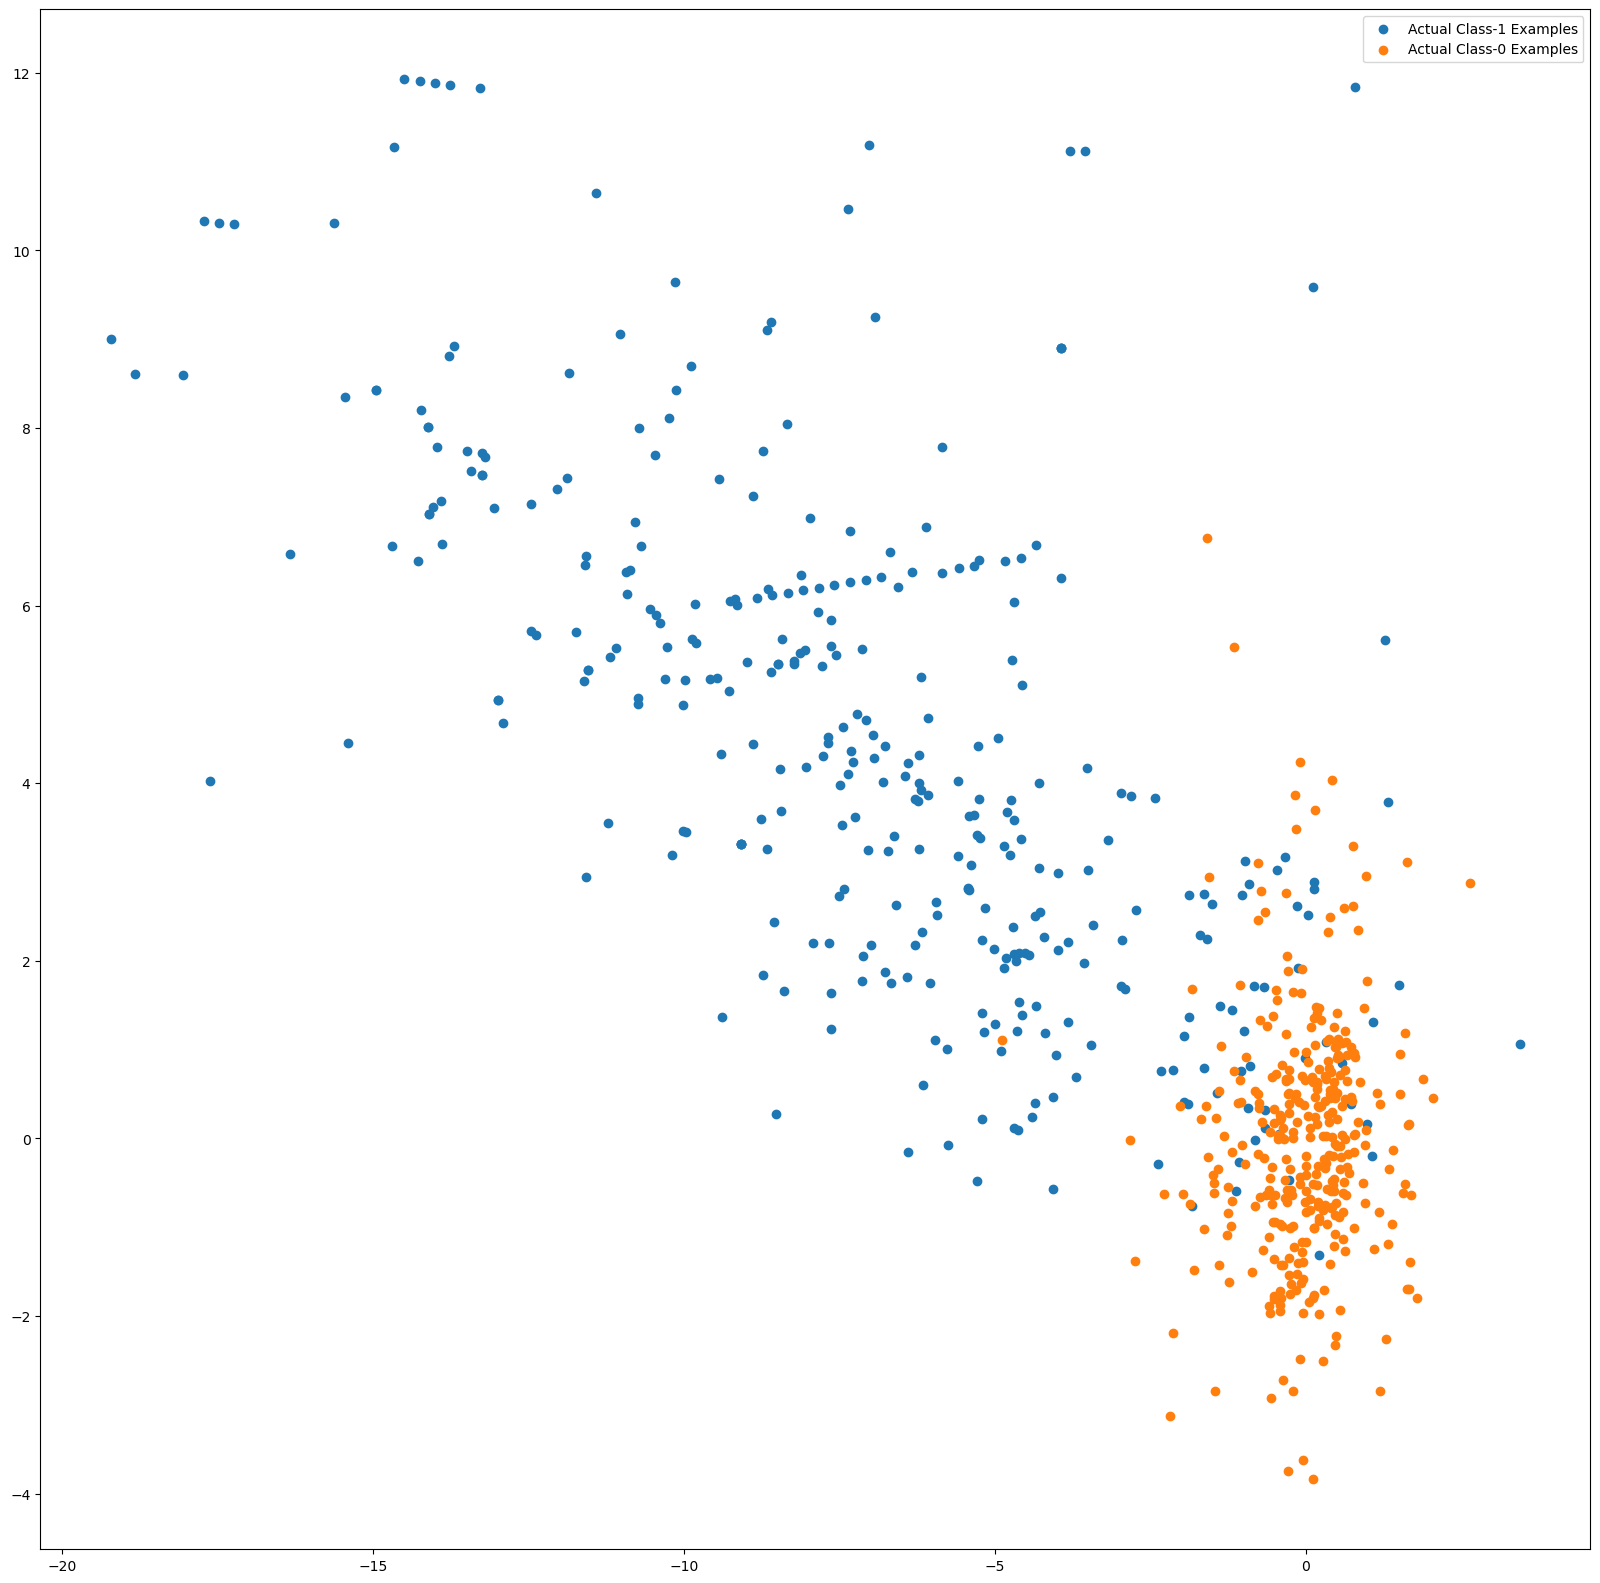

In [32]:
clf = xgb_adasyn  #initialise the model with optimum hyperparameters
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

TPR = 127
FPR = 44
FNR = 21


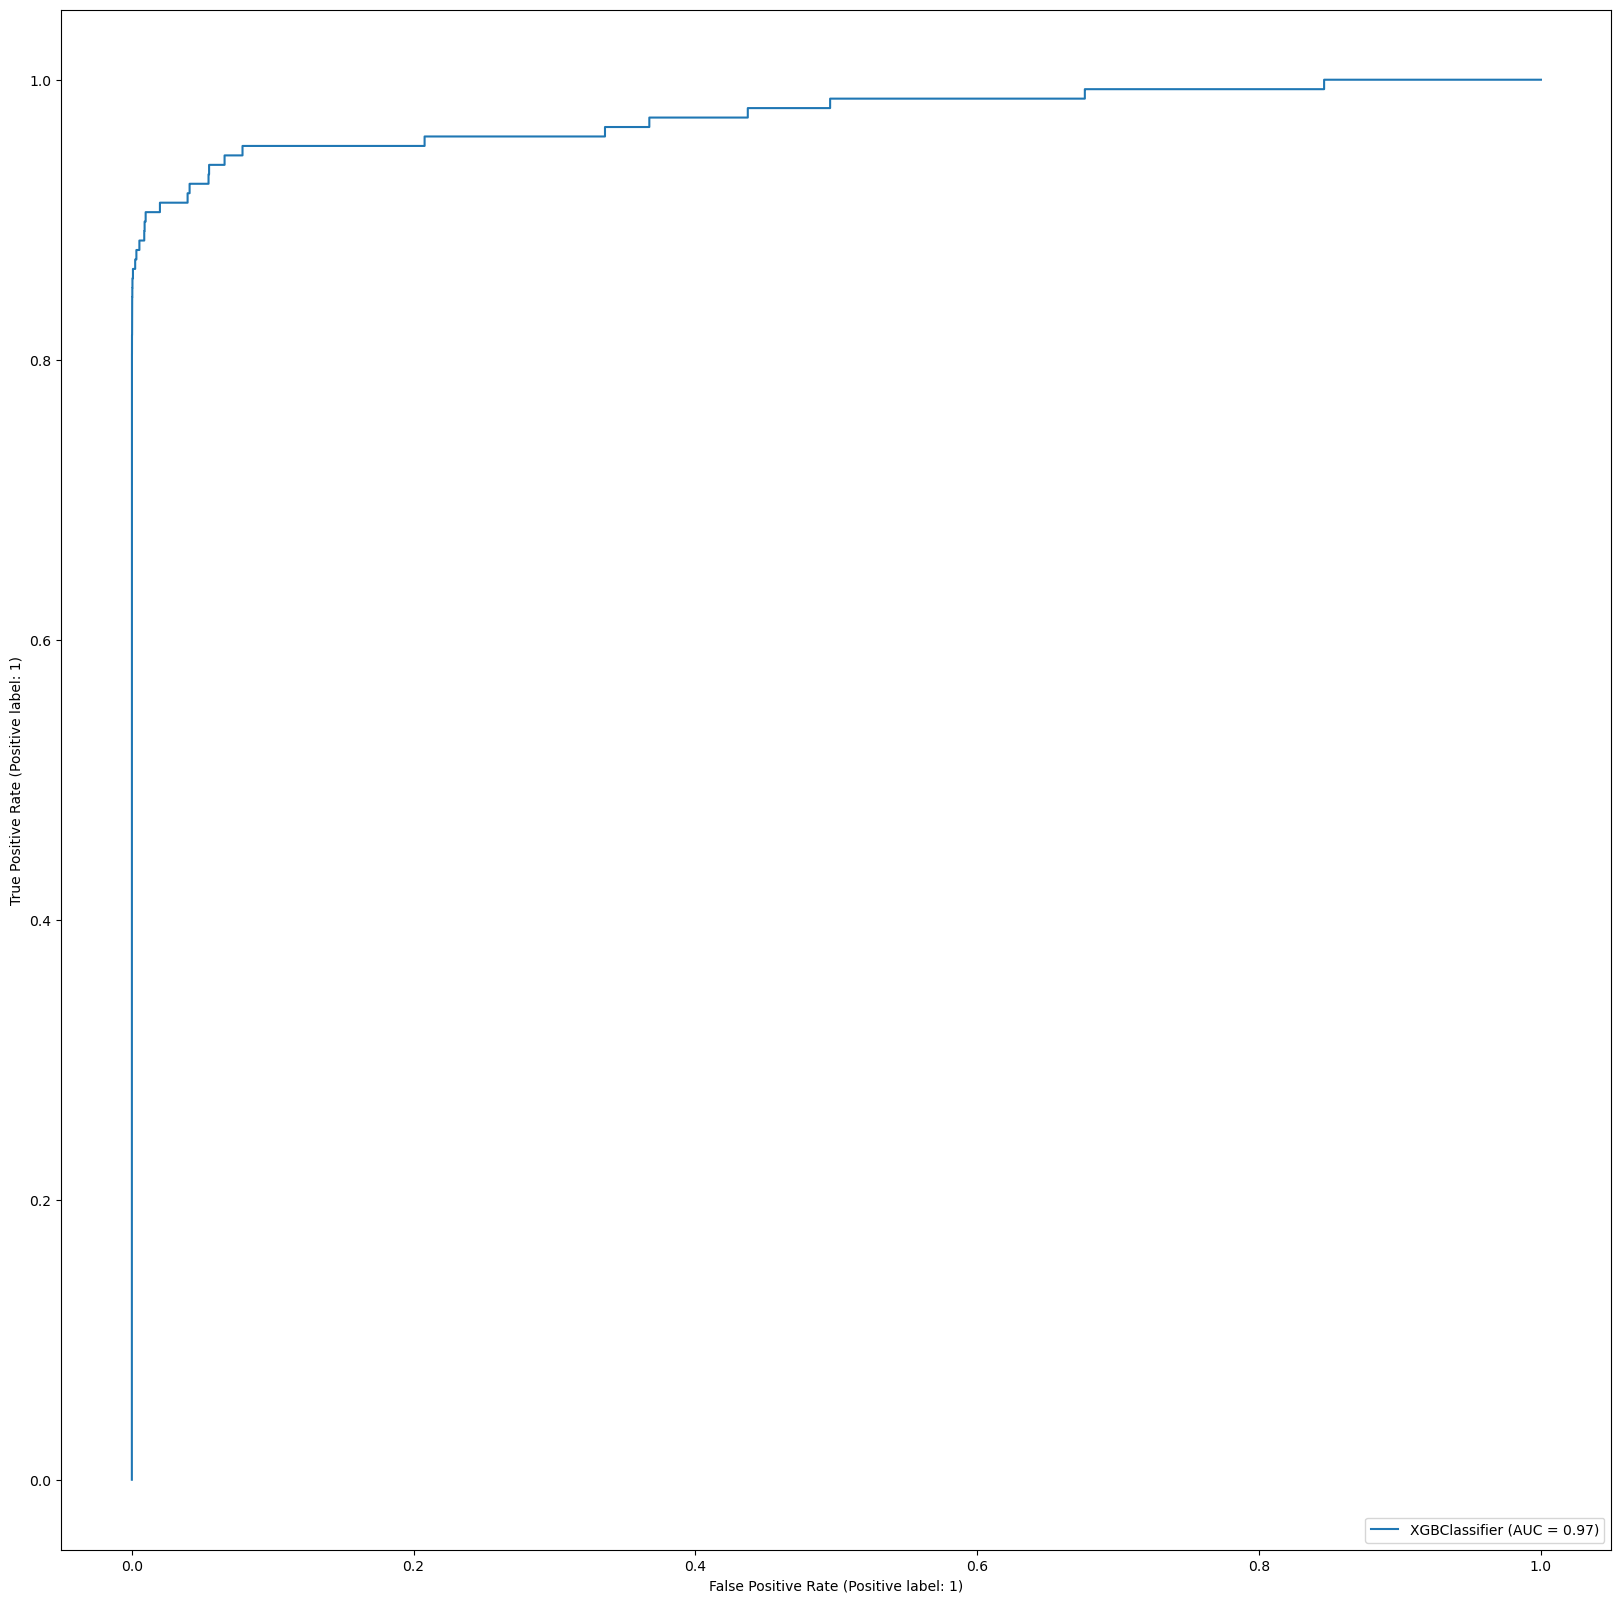

In [33]:
#### Print the FPR,TPR & select the best threshold from the roc curve

y_test_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print ("TPR = " + str(tp))
print ("FPR = " + str(fp))
print ("FNR = " + str(fn))

rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

# this is the data for probability cutoff of 0.5

In [34]:
# Deep dive on metrics for each probability cutoff
y_test_pred_proba = clf.predict_proba(X_test)
y_test_pred = calcProbCutoff(y_test_pred_proba, y_test)
cutoff_df = calcMetrics(y_test_pred, y_test)
print (round(cutoff_df, 2))

# 0.75 probability cutoff appears to be giving the optimal results

      prob  accuracy  sensi  speci     TP       TN       FP    FN  precision  \
0.00  0.00      0.00   1.00   0.00  148.0      0.0  85291.0   0.0       0.00   
0.05  0.05      0.99   0.89   0.99  131.0  84831.0    460.0  17.0       0.22   
0.10  0.10      1.00   0.87   1.00  129.0  85043.0    248.0  19.0       0.34   
0.15  0.15      1.00   0.86   1.00  128.0  85119.0    172.0  20.0       0.43   
0.20  0.20      1.00   0.86   1.00  128.0  85169.0    122.0  20.0       0.51   
0.25  0.25      1.00   0.86   1.00  128.0  85194.0     97.0  20.0       0.57   
0.30  0.30      1.00   0.86   1.00  128.0  85207.0     84.0  20.0       0.60   
0.35  0.35      1.00   0.86   1.00  128.0  85223.0     68.0  20.0       0.65   
0.40  0.40      1.00   0.86   1.00  127.0  85230.0     61.0  21.0       0.68   
0.45  0.45      1.00   0.86   1.00  127.0  85239.0     52.0  21.0       0.71   
0.50  0.50      1.00   0.86   1.00  127.0  85247.0     44.0  21.0       0.74   
0.55  0.55      1.00   0.85   1.00  126.

In [35]:
# All parameters are balanced.
# FINAL METRICS
printMetrics (y_test, y_test_pred[0.75])

ROC_AUC_Score = 0.92
Sensitivity = 0.84
Specificity = 1.0
Precision = 0.87


In [36]:
# Random sampling is performing better in terms of precision but Sensitivity is slightly lower compared to SMOTE and Adasyn.
# I have chose ADASYN sampling with XGBoost as the final model
# SMOTE sampling with XGBoost also give equivalent results